# Tennis Image Detection : Player, Racket and Ball

## Importing libraries

In [33]:
import cv2
import numpy as np

## Connecting to Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Yolo Model

In [35]:
# loading the network
net = cv2.dnn.readNet("/content/drive/MyDrive/yolo/yolov3.weights", "/content/drive/MyDrive/yolo/yolov3.cfg")
# loading the classes
classes = []
with open("/content/drive/MyDrive/yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
classes[0] = "tennis player"
# loading layers and colors
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Loading Image

In [36]:
# saving the image
img = cv2.imread("/content/tennis8.jpg")
# changing size of image
img = cv2.resize(img, None, fx=1.3, fy=1.3)
# getting shape informations
img_height, img_width, channels = img.shape

## Detecting Objects

In [37]:
# binary large object of image
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
# putting the image blob on the network
net.setInput(blob)
# saving the output of the network
outputs = net.forward(output_layers)

## Displaying informations

In [38]:
# list of classes index
class_ids = []
# list of classes confidences
confidences = []
# list of classes boxes
boxes = []
# iterating over the detections
for output in outputs:
    for detection in output:
        # saving the index and the confidence of the detected class
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # coordinates of the object detected
            center_x = int(detection[0] * img_width)
            center_y = int(detection[1] * img_height)
            width = int(detection[2] * img_width)
            height = int(detection[3] * img_height)
            # coordinates of the rectangle box 
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)
            boxes.append([x, y, width, height])
            confidences.append(float(confidence))
            class_ids.append(class_id)
# indexs for boxes and classes
indexs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

## Displaying results

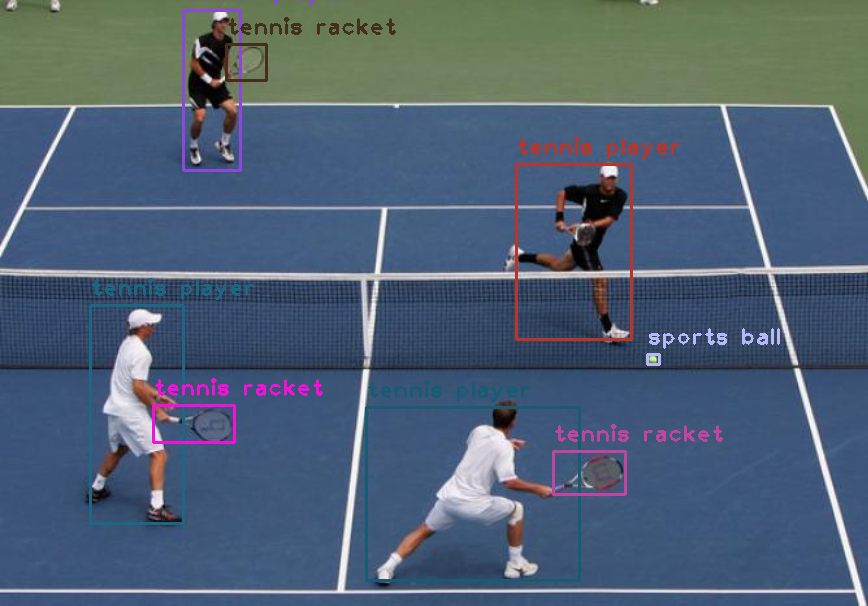

In [39]:
# using a patch because colab doesn't support cv2.imshow()
from google.colab.patches import cv2_imshow
# choosing a font for text
font = cv2.FONT_HERSHEY_PLAIN
# iterating over the boxes
for i in range(len(boxes)):
    # verifying if the index is in our list
    if i in indexs:
        # positions of the box
        x, y, w, h = boxes[i]
        # name of the class detected
        label = str(classes[class_ids[i]])
        # color to use for rectangle and text
        color = colors[i]
        # drawing the rectangle on the image
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        # writing the text on the image
        cv2.putText(img, label, (x, y - 10), font, 1.5, color, 2)
# showing the image
cv2_imshow(img)